# Convertir Csv

In [1]:
import uproot
import pandas as pd
import os

# Ruta de la carpeta que contiene los archivos .root
folder_path = r"C:\Users\conej\Documents\Universidad\Geant4\Projects\Git\G4-PCM\build\Release"

# Obtener la lista de archivos .root en la carpeta
root_files = [f for f in os.listdir(folder_path) if f.endswith(".root")]

# Carpeta actual desde donde se ejecuta el script
output_folder = os.getcwd()

# Procesar cada archivo .root
for root_file in root_files:
    # Ruta completa del archivo .root
    root_file_path = os.path.join(folder_path, root_file)
    
    # Abrir el archivo .root usando uproot
    with uproot.open(root_file_path) as file:
        # Acceder a la ntuple G4_PCM
        ntuple = file["G4_PCM"]
        
        # Extraer las ramas Energy, PositionX, PositionY, PositionZ
        data = ntuple.arrays(["Energy", "PositionX", "PositionY", "PositionZ"], library="pd")
        
        # Convertir a DataFrame de pandas
        df = pd.DataFrame(data)
        
        # Nombre del archivo de salida .csv
        csv_file_name = os.path.splitext(root_file)[0] + ".csv"
        csv_file_path = os.path.join(output_folder, csv_file_name)
        
        # Guardar el DataFrame en un archivo .csv en la carpeta actual
        df.to_csv(csv_file_path, index=False)

        print(f"Archivo convertido: {csv_file_name}")


Archivo convertido: Sim0.csv
Archivo convertido: Sim1.csv
Archivo convertido: Sim2.csv


# Graficar

# Individual

# Multiples

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos y etiquetas correspondientes
files = ['Sim0.csv', 'Sim1.csv', 'Sim2.csv']
labels = ['20cm', '50cm', '100cm']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Iterar sobre los archivos y los ejes para graficar cada uno
for i, (file, label) in enumerate(zip(files, labels)):
    # Leer los datos del archivo CSV
    df = pd.read_csv(file)
    
    # Graficar los puntos en 2D
    sc = axes[i].scatter(df['PositionX'], df['PositionY'], c=df['Energy'], cmap='Spectral', s=1)
    
    # Etiquetas de los ejes
    axes[i].set_xlabel('PositionX')
    axes[i].set_ylabel('PositionY')
    
    # Cambiar los rangos de los ejes
    axes[i].set_xlim(-50, 50)  # Rango para el eje X
    axes[i].set_ylim(-50, 50)  # Rango para el eje Y
    
    # Título del subgráfico
    axes[i].set_title(label)

# Añadir una barra de color compartida para todos los subplots, colocándola debajo
cbar = fig.colorbar(sc, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('Energy')

# Ajustar el layout para que no se superpongan los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


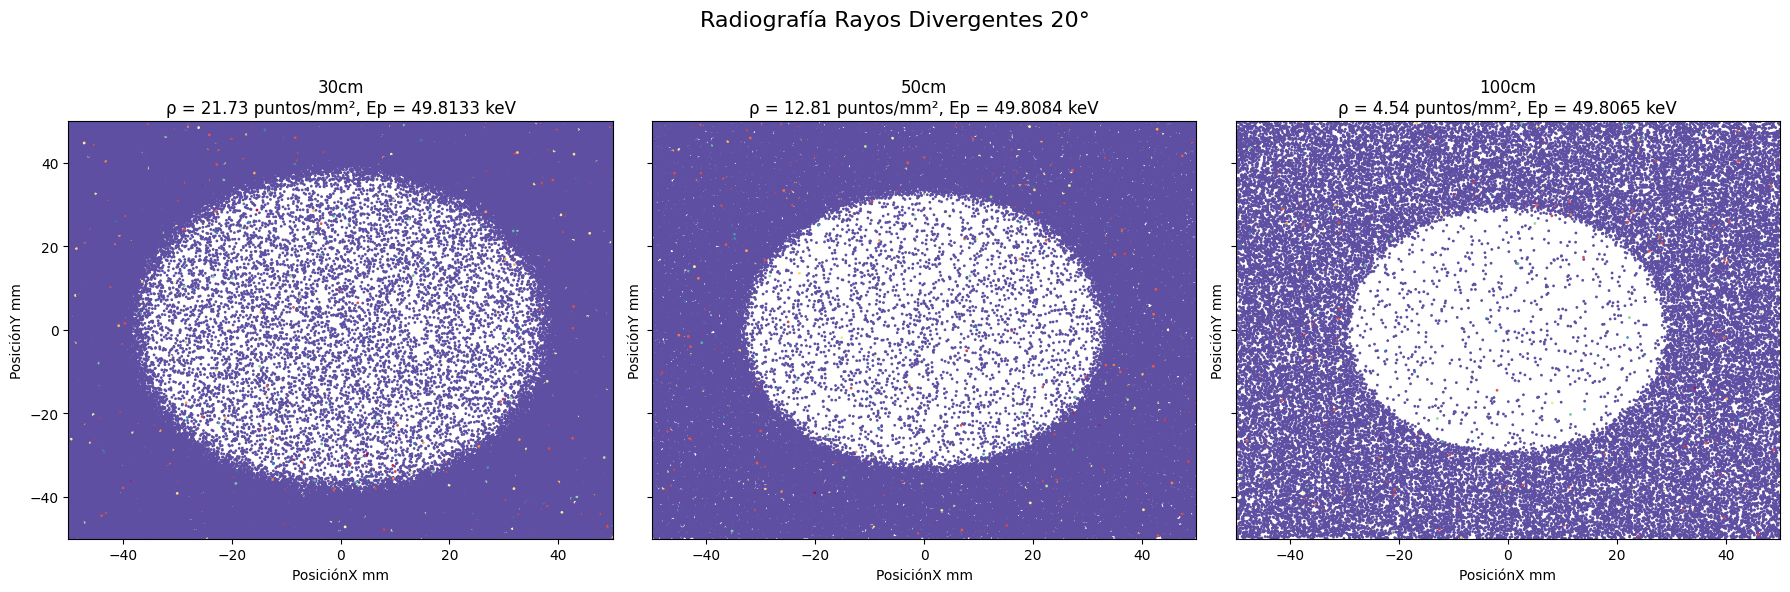

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos y etiquetas correspondientes
files = ['Sim0.csv', 'Sim1.csv', 'Sim2.csv']
labels = ['30cm', '50cm', '100cm']

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Definir los rangos de los ejes
x_min, x_max = -50, 50
y_min, y_max = -50, 50

# Calcular el área de la región graficada
area = (x_max - x_min) * (y_max - y_min)

# Iterar sobre los archivos y los ejes para graficar cada uno
for i, (file, label) in enumerate(zip(files, labels)):
    # Leer los datos del archivo CSV
    df = pd.read_csv(file)
    
    # Filtrar los datos para que solo incluyan puntos dentro de los rangos de los ejes
    df_filtered = df[(df['PositionX'] >= x_min) & (df['PositionX'] <= x_max) &
                     (df['PositionY'] >= y_min) & (df['PositionY'] <= y_max)]
    
    # Contar cuántos puntos hay en la región graficada
    point_count = df_filtered.shape[0]
    
    # Calcular la densidad de puntos (número de puntos por unidad de área)
    point_density = point_count / area
    
    # Calcular el promedio de energía
    energy_mean = df_filtered['Energy'].mean()
    
    # Graficar los puntos en 2D
    sc = axes[i].scatter(df_filtered['PositionX'], df_filtered['PositionY'], c=df_filtered['Energy'], cmap='Spectral', s=1)
    
    # Etiquetas de los ejes
    axes[i].set_xlabel('PosiciónX mm')
    axes[i].set_ylabel('PosiciónY mm')
    
    # Cambiar los rangos de los ejes
    axes[i].set_xlim(x_min, x_max)  # Rango para el eje X
    axes[i].set_ylim(y_min, y_max)  # Rango para el eje Y
    
    # Añadir la densidad de puntos y el promedio de energía al título del subgráfico
    axes[i].set_title(f'{label}\nρ = {point_density:.2f} puntos/mm², Ep = {energy_mean:.4f} keV')

# # Añadir una barra de color compartida para todos los subplots, colocándola debajo
# cbar = fig.colorbar(sc, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
# cbar.set_label('Energy')

# Añadir un título global
plt.suptitle('Radiografía Rayos Divergentes 20°', fontsize=16)

# Ajustar el layout para que no se superpongan los elementos
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar el gráfico
plt.show()
